In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from load_data import load_dataset
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
model = load_model("Saved_Model/Model.h5")
model.set_weights(model.get_weights())

In [3]:
train_x, train_y, test_x, test_y, n_classes, genre = load_dataset(verbose=1, mode="Train", datasetSize=0.75)

train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2], 1)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)

train_x = train_x / 255.
test_x = test_x / 255.

Compiling Training and Testing Sets ...


In [4]:
predictions = model.predict(test_x, verbose=0)

In [5]:
train_x = train_x * 255.
test_x = test_x * 255.
train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2])
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2])
train_x = train_x.astype(int)
test_x = test_x.astype(int)

In [6]:
sample_indices = random.sample(range(test_x.shape[0]), 10)
sample_images = [test_x[i] for i in sample_indices]
sample_labels = [np.argmax(test_y[i]) for i in sample_indices]
sample_labels_softmax = [predictions[i] for i in sample_indices]
predicted = [np.argmax(predictions[i]) for i in sample_indices]

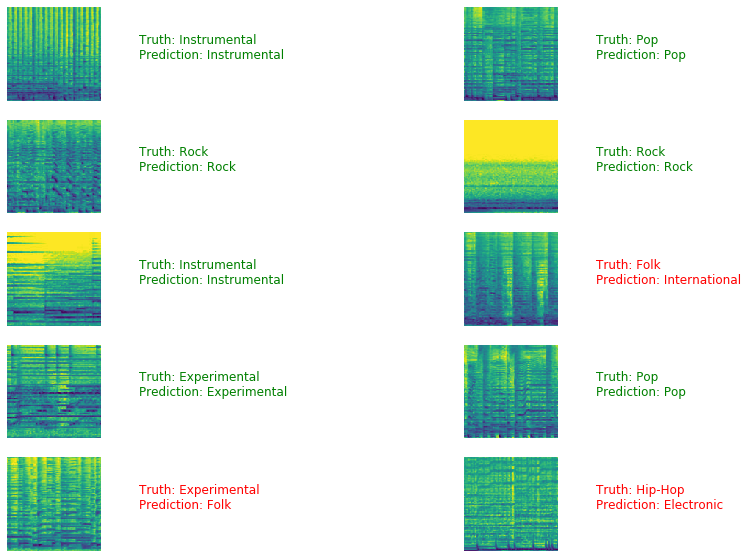

In [8]:
fig = plt.figure(figsize=(15, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    truth_genre = genre[truth]
    prediction = predicted[i]
    prediction_genre = genre[prediction]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(180, 70, "Truth: {0}\nPrediction: {1}".format(truth_genre, prediction_genre),
             fontsize=12, color=color)
    plt.imshow(sample_images[i])
plt.savefig("Graphs/Training_Prediction.jpg", cmap='gray_r')
plt.show()

In [14]:
filename = "Saved_Model/training_history.csv"
history = pd.read_csv(filename, header=0, low_memory=False)
history_array = history.values
epochs = history_array[:, 0]
training_accuracy = history_array[:, 2]
training_loss = history_array[:, 1]
val_accuracy = history_array[:, 4]
val_loss = history_array[:, 3]

In [13]:
val_accuracy

array([0.3655, 0.3789, 0.4358, 0.4837, 0.4487, 0.5308, 0.5561, 0.5678,
       0.5953, 0.5992, 0.6208, 0.6158, 0.6676, 0.6525, 0.6771, 0.6869,
       0.702 , 0.7031, 0.713 , 0.7183, 0.7402, 0.7281, 0.7307, 0.7469,
       0.7312, 0.7368, 0.7396, 0.6987, 0.7525])

Text(0, 0.5, 'Accuracy')

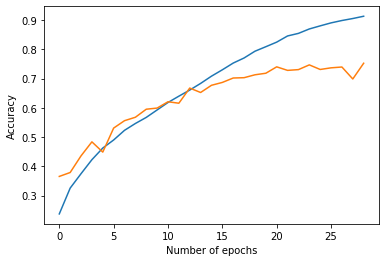

In [15]:
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

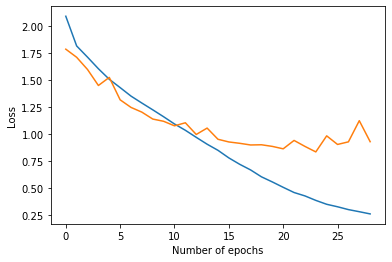

In [16]:
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

In [17]:
y_pred = np.argmax(predictions, axis=1)
y_test = np.argmax(test_y, axis=1)
confusion_matrix = confusion_matrix(y_test, y_pred)

In [18]:
confusion_matrix

array([[223,   5,  15,   2,   6,   4,   3,   1],
       [  9, 208,   5,   7,   5,   3,   3,   0],
       [ 13,   6, 196,   0,  16,   3,  10,   4],
       [  6,  16,   1, 208,   9,  14,  15,   4],
       [  3,   7,   5,  11, 181,  13,   5,  11],
       [  3,   7,   3,   4,   8, 196,  11,   2],
       [ 15,  22,   8,   9,  21,  19, 120,   6],
       [  0,   7,  11,  10,  22,  10,  13,  95]], dtype=int64)

In [19]:
labels = ["Hip-Hop", "International", "Electronic", "Folk", "Experimental", "Rock", "Pop", "Instrumental"]

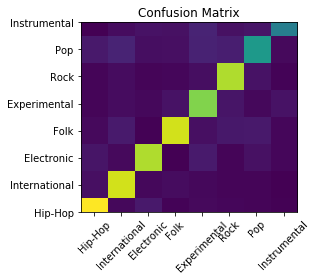

In [27]:
plt.imshow(confusion_matrix[::-1], interpolation='nearest')
plt.title('Confusion Matrix')
tick_marks = [i for i in range(len(labels))]
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks[::-1], labels)
plt.tight_layout()